#Fuzzy system in R
Key reference: http://juandes.github.io/FuzzyLogic-R/docs/fuzzy_tutorial

In [0]:
install.packages("sets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
library(sets)

In [0]:
## Set the range (universe) for fuzzy set
sets_options("universe", seq(from=0,to=100, by=1))

In [0]:
## Fuzzy set
variables=set(Content_Quality = fuzzy_variable(
 C_low =fuzzy_trapezoid(corners = c(-20, 0, 25, 54)),
 C_medium =fuzzy_trapezoid(corners = c(30, 54, 54, 80)),
 C_high=fuzzy_trapezoid(corners = c(45, 75, 100, 120))),
               
Presentation_Quality = fuzzy_variable(
  P_low = fuzzy_trapezoid(corners = c(-20, 0, 30, 50)),
  P_medium = fuzzy_trapezoid(corners = c(30, 50, 50, 80)),
  P_high=fuzzy_trapezoid(corners = c(50, 80, 100, 120))),

Teaching_Quality = fuzzy_variable
(T_low = fuzzy_trapezoid(corners = c(-20, 0, 25, 55)),
T_medium = fuzzy_trapezoid(corners = c(30, 55, 55, 80)),
T_high=fuzzy_trapezoid(corners = c(55, 85, 100, 120)))
)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

In [0]:
## Fuzzy rule
rules=set(fuzzy_rule(Content_Quality%is%C_low||Presentation_Quality%is%P_low, Teaching_Quality%is%T_low),
          fuzzy_rule(Content_Quality%is%C_medium &&Presentation_Quality%is%P_medium, Teaching_Quality%is%T_medium),
          fuzzy_rule(Content_Quality%is%C_high &&Presentation_Quality%is%P_high, Teaching_Quality%is%T_high))


A fuzzy system consisting of 3 variables and 3 rules.

Variables:

Presentation_Quality(P_low, P_medium, P_high)
Content_Quality(C_low, C_medium, C_high)
Teaching_Quality(T_low, T_medium, T_high)

Rules:

Content_Quality %is% C_high && Presentation_Quality %is% P_high => Teaching_Quality %is% T_high
Content_Quality %is% C_medium && Presentation_Quality %is% P_medium => Teaching_Quality %is% T_medium
Content_Quality %is% C_low || Presentation_Quality %is% P_low => Teaching_Quality %is% T_low


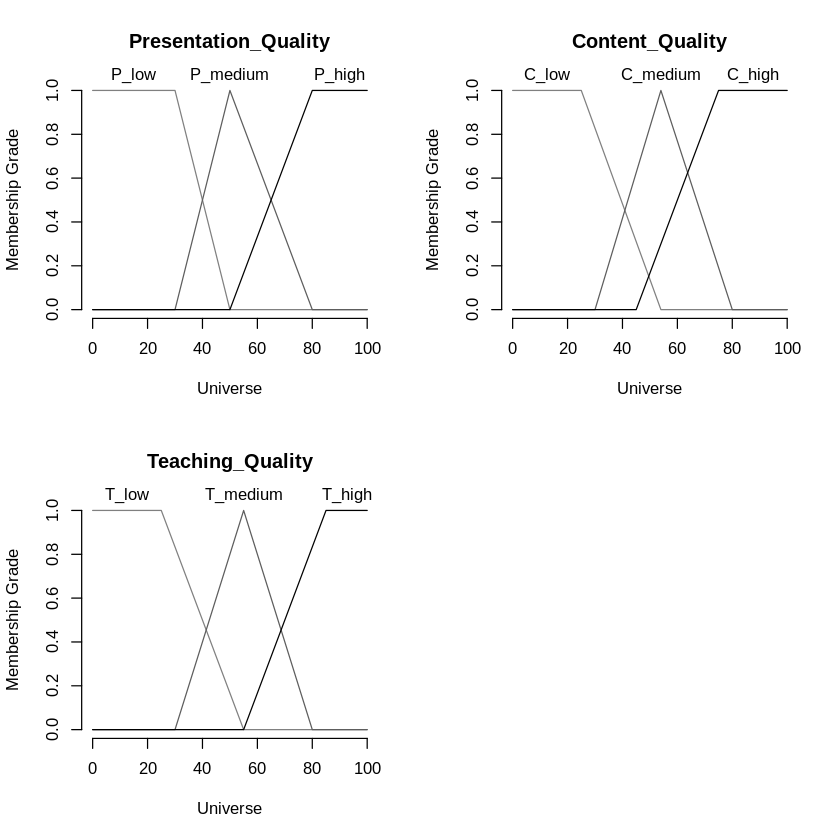

In [0]:
## Visualize set and rule

system=fuzzy_system(variables, rules)
print(system)
plot(system)


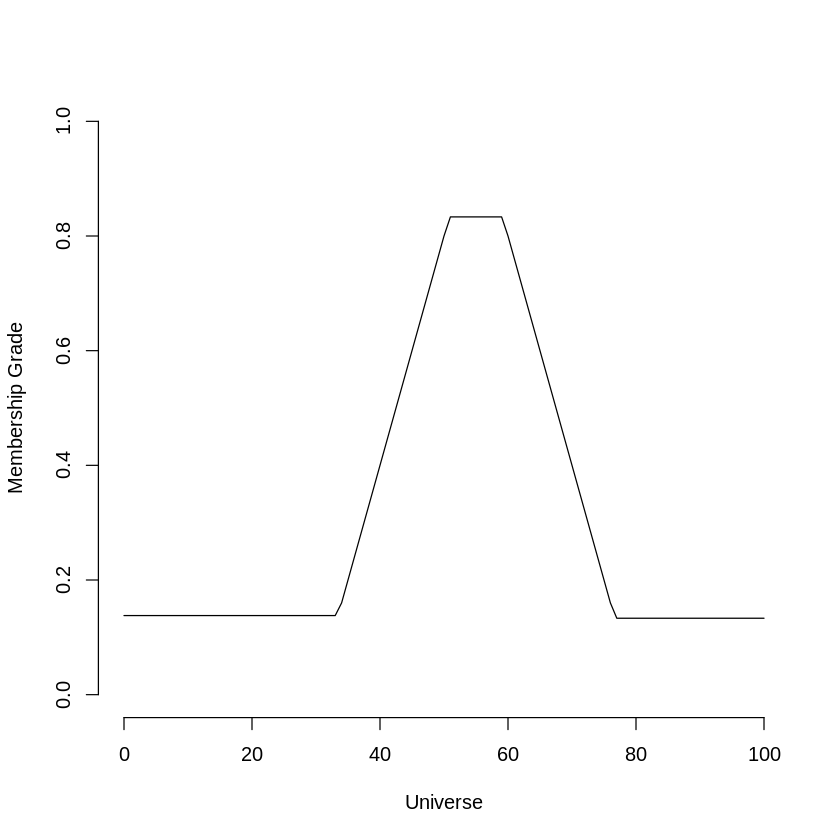

In [0]:
## Fuzzy inference
fi=fuzzy_inference(system,list(Content_Quality=50, Presentation_Quality=54))

plot(fi)

In [0]:
## Result
gset_defuzzify(fi,'centroid')

[1] 52.68677

In [0]:
gset_defuzzify(fi,'meanofmax')

[1] 55

In [0]:
gset_defuzzify(fi,'smallestofmax')

[1] 51

In [0]:
gset_defuzzify(fi,'largestofmax')

[1] 59

In [0]:
gset_defuzzify(fi,'centroid')

[1] 52.68677